In [ ]:
# Setting up Spark

!ls
!rm -f spark-3.4.[01]-bin-hadoop3.tgz*
!rm -rf spark-3.4.[01]-bin-hadoop3
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget https://downloads.apache.org/spark/spark-3.4.2/spark-3.4.2-bin-hadoop3.tgz
!tar -xf spark-3.4.2-bin-hadoop3.tgz
!ls -alt


sample_data
--2024-04-06 14:26:12--  https://downloads.apache.org/spark/spark-3.4.2/spark-3.4.2-bin-hadoop3.tgz
Resolving downloads.apache.org (downloads.apache.org)... 135.181.214.104, 88.99.208.237, 2a01:4f9:3a:2c57::2, ...
Connecting to downloads.apache.org (downloads.apache.org)|135.181.214.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 388664780 (371M) [application/x-gzip]
Saving to: ‘spark-3.4.2-bin-hadoop3.tgz’

spark-3.4.2-bin-had 100%[===================>] 370.66M  23.1MB/s    in 17s     

2024-04-06 14:26:30 (21.7 MB/s) - ‘spark-3.4.2-bin-hadoop3.tgz’ saved [388664780/388664780]

total 379576
drwxr-xr-x  1 root root      4096 Apr  6 14:26 .
drwxr-xr-x  1 root root      4096 Apr  6 14:25 ..
drwxr-xr-x  1 root root      4096 Apr  4 13:24 sample_data
drwxr-xr-x  4 root root      4096 Apr  4 13:24 .config
-rw-r--r--  1 root root 388664780 Nov 25 07:49 spark-3.4.2-bin-hadoop3.tgz
drwxr-xr-x 13 1000 1000      4096 Nov 25 07:48 spark-3.4.2-bin-hadoop3


In [ ]:
# installation of findspark
!pip3 install findspark

In [ ]:
# Initializing the spark and setting the SPARK_HOME to same version
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.4.2-bin-hadoop3"
import findspark
findspark.init()
from pyspark import SparkConf, SparkContext

In [ ]:
# get file for TFL
!wget https://cycling.data.tfl.gov.uk/usage-stats/cyclehireusagestats-2014.zip
!unzip cyclehireusagestats-2014.zip

--2024-04-06 14:26:44--  https://cycling.data.tfl.gov.uk/usage-stats/cyclehireusagestats-2014.zip
Resolving cycling.data.tfl.gov.uk (cycling.data.tfl.gov.uk)... 104.16.98.104, 104.16.97.104
Connecting to cycling.data.tfl.gov.uk (cycling.data.tfl.gov.uk)|104.16.98.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 225215129 (215M) [application/zip]
Saving to: ‘cyclehireusagestats-2014.zip’

cyclehireusagestats 100%[===================>] 214.78M   161MB/s    in 1.3s    

2024-04-06 14:26:45 (161 MB/s) - ‘cyclehireusagestats-2014.zip’ saved [225215129/225215129]

Archive:  cyclehireusagestats-2014.zip
  inflating: 1. Journey Data Extract 05Jan14-02Feb14.csv  
  inflating: 10a. Journey Data Extract 14Sep14-27Sep14.csv  
  inflating: 10b. Journey Data Extract 28Sep14-11Oct14.csv  
  inflating: 11a. Journey Data Extract 12Oct14-08Nov14.csv  
  inflating: 11b. Journey Data Extract 12Oct14-08Nov14.csv  
  inflating: 12a. Journey Data Extract 09Nov14-06Dec14.csv  
  i

In [ ]:
# creating spark session
from pyspark.sql import *
from pyspark.sql.functions import *

spark = SparkSession.builder.appName("bikes").getOrCreate()

In [ ]:
file1="./1. Journey*csv" # 05 Jan to 02 Feb
file2="./2. Journey*csv" # 03 Feb to 01 Mar
file3="./3. Journey*csv" # 02 Mar to 31 Mar
file4="./4. Journey*csv" # 01 Apr to 26 Apr
file5="./5. Journey*csv" # 27 Apr to 24 May
file6="./6. Journey*csv" # 25 May to 21 Jun
file7="./7. Journey*csv" # 22 Jun to 19 Jul
file8a="./8a Journey*csv" # 20 Jul to 31 Jul
file8b="./8b Journey*csv" # 01 Aug to 16 Aug
file9a="./9a Journey*csv" # 17 Aug to 31 Aug
file9b="./9b Journey*csv" # 01 Sep to 13 Sep
file10a="./10a. Journey*csv" # 20 Jul to 31 Jul
file10b="./10b. Journey*csv" # 01 Aug to 16 Aug
file11a="./11a. Journey*csv" # 17 Aug to 31 Aug
file11b="./11b. Journey*csv" # 01 Sep to 13 Sep
file12a="./12a. Journey*csv" # 20 Jul to 31 Jul
file12b="./12b. Journey*csv" # 01 Aug to 16 Aug
file13a="./13a. Journey*csv" # 17 Aug to 31 Aug
file13b="./13b. Journey*csv" # 01 Sep to 13 Sep
file14="./14. Journey*csv" # 01 Sep to 13 Sep
# we might say therefore that data in these 3 files corresponds to "winter" in the UK
cycle_df = (spark.read.format("csv")
         .option("header", "true")
         .option("inferSchema", "true")
         .load([file1, file2, file3, file4, file5, file6, file7, file8a, file8b, file9a, file9b, file10a, file10b, file11a, file11b, file12a, file12b, file13a, file13b, file14]))

In [ ]:
#shows the top 10 rows of the data loaded
cycle_df.show(10)

+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+
|Rental Id|Duration|Bike Id|        End Date|EndStation Id|     EndStation Name|      Start Date|StartStation Id|   StartStation Name|
+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+
| 34263367|    1080|   9076|24/06/2014 00:57|          695|Islington Green, ...|24/06/2014 00:39|            311|Foley Street, Fit...|
| 34603487|     660|   6328|03/07/2014 11:51|          695|Islington Green, ...|03/07/2014 11:40|             22|Northington Stree...|
| 34689078|     120|   2006|05/07/2014 15:09|          357|Howland Street, F...|05/07/2014 15:07|            311|Foley Street, Fit...|
| 34724273|    1260|   7904|06/07/2014 16:35|          695|Islington Green, ...|06/07/2014 16:14|            311|Foley Street, Fit...|
| 34956750|    1500|   8251|13/07/2014 00:41|          

In [ ]:
# getting all the datatypes of the columns
cycle_df.dtypes

[('Rental Id', 'string'),
 ('Duration', 'string'),
 ('Bike Id', 'string'),
 ('End Date', 'string'),
 ('EndStation Id', 'string'),
 ('EndStation Name', 'string'),
 ('Start Date', 'string'),
 ('StartStation Id', 'string'),
 ('StartStation Name', 'string')]

In [ ]:
# counting the number of rows in the dataset
cycle_df.count()

11481596

In [ ]:
# a statistical description of the dataset
cycle_df.describe().show()

+-------+--------------------+------------------+------------------+----------------+-----------------+--------------------+----------------+------------------+--------------------+
|summary|           Rental Id|          Duration|           Bike Id|        End Date|    EndStation Id|     EndStation Name|      Start Date|   StartStation Id|   StartStation Name|
+-------+--------------------+------------------+------------------+----------------+-----------------+--------------------+----------------+------------------+--------------------+
|  count|            10242483|          10242483|          10242483|        10242483|         10242351|            10242351|        10242483|          10242483|            10242483|
|   mean|3.4862637579402864E7| 1466.081447242822| 6712.062896858115|            null|320.5373222417392|                null|            null| 321.1881879618448|                null|
| stddev|  3169119.8833308937|12946.838147599005|3719.8446340975797|            null|210.2

In [ ]:
# total number of rows with negative duraation, this might have happened due to entry errors
cycle_df.filter(col('Duration')< 0).count()


149

In [ ]:
# filtering baylis station out of the dataset
baylis_station = cycle_df.filter(cycle_df['StartStation Name' ]== 'Baylis Road, Waterloo')

baylis_station.show(10)

+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+
|Rental Id|Duration|Bike Id|        End Date|EndStation Id|     EndStation Name|      Start Date|StartStation Id|   StartStation Name|
+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+
| 34335942|     600|   7213|25/06/2014 18:59|          199|Great Tower Stree...|25/06/2014 18:49|            272|Baylis Road, Wate...|
| 34292680|     540|  11506|24/06/2014 18:12|          199|Great Tower Stree...|24/06/2014 18:03|            272|Baylis Road, Wate...|
| 34251992|     600|   1845|23/06/2014 17:58|          199|Great Tower Stree...|23/06/2014 17:48|            272|Baylis Road, Wate...|
| 34618956|     720|   8070|03/07/2014 17:59|          199|Great Tower Stree...|03/07/2014 17:47|            272|Baylis Road, Wate...|
| 34574886|     600|   2786|02/07/2014 17:57|          

In [ ]:
baylis_station.count()

27271

In [ ]:
baylis_station = cycle_df.filter(cycle_df['StartStation Name']== 'Baylis Road, Waterloo')[['Duration', 'Start Date', 'StartStation Name']]

baylis_station.show(10)

+--------+----------------+--------------------+
|Duration|      Start Date|   StartStation Name|
+--------+----------------+--------------------+
|     600|25/06/2014 18:49|Baylis Road, Wate...|
|     540|24/06/2014 18:03|Baylis Road, Wate...|
|     600|23/06/2014 17:48|Baylis Road, Wate...|
|     720|03/07/2014 17:47|Baylis Road, Wate...|
|     600|02/07/2014 17:47|Baylis Road, Wate...|
|     660|18/07/2014 20:28|Baylis Road, Wate...|
|     540|17/07/2014 18:14|Baylis Road, Wate...|
|     600|16/07/2014 18:04|Baylis Road, Wate...|
|     720|09/07/2014 18:42|Baylis Road, Wate...|
|     660|14/07/2014 17:43|Baylis Road, Wate...|
+--------+----------------+--------------------+
only showing top 10 rows



In [ ]:
baylis_station.filter("Duration is null").show()

# reference: https://medium.com/@santosh_beora/dealing-with-nulls-in-apache-spark-strategies-and-examples-dc2c47ec2357

+--------+----------+-----------------+
|Duration|Start Date|StartStation Name|
+--------+----------+-----------------+
+--------+----------+-----------------+



In [ ]:
# Filtering the dataset to determine the missing rows
rows_with_missing_values = cycle_df.filter(
    (col("Rental Id").isNull()) |
    (col("Duration").isNull()) |
    (col("Bike Id").isNull()) |
    (col("End Date").isNull()) |
    (col("EndStation Id").isNull()) |
    (col("EndStation Name").isNull()) |
    (col("Start Date").isNull()) |
    (col("StartStation Id").isNull()) |
    (col("StartStation Name").isNull())
)

# Show the rows with missing values
rows_with_missing_values.show()

# The missing values might have happened because the user refuses to return the bike to the end station after usage
# It will be difficult to assign an end station name or ID, one is needed to derive the other and as such missing values can be filled if pressent


+---------+--------+-------+----------------+-------------+---------------+----------------+---------------+--------------------+
|Rental Id|Duration|Bike Id|        End Date|EndStation Id|EndStation Name|      Start Date|StartStation Id|   StartStation Name|
+---------+--------+-------+----------------+-------------+---------------+----------------+---------------+--------------------+
| 34568352|    1200|   3238|02/07/2014 16:15|         null|           null|02/07/2014 15:55|            592|Bishop's Bridge R...|
| 34806702|     660|   1524|08/07/2014 19:27|         null|           null|08/07/2014 19:16|            319|Baldwin Street, S...|
| 35225290|     960|    326|19/07/2014 15:30|         null|           null|19/07/2014 15:14|            378|Natural History M...|
| 34367486|     780|   7766|26/06/2014 16:25|         null|           null|26/06/2014 16:12|            670|Ashley Crescent, ...|
| 34444503|     900|   4841|29/06/2014 09:00|         null|           null|29/06/2014 08:4

In [ ]:
rows_with_missing_values.count()

1239245

In [ ]:
# Filtering the dataset to determine the missing rows, excluding end station name and end station id
rows_with_missing_values = cycle_df.filter(
    (col("Rental Id").isNull()) |
    (col("Duration").isNull()) |
    (col("Bike Id").isNull()) |
    (col("End Date").isNull()) |
    (col("Start Date").isNull()) |
    (col("StartStation Id").isNull()) |
    (col("StartStation Name").isNull())
)

# Show the rows with missing values
rows_with_missing_values.show()

# Also i can infer that there are some rows with no value, this might be due to system issue
# In this case, I will drop all the missing values

+---------+--------+-------+--------+-------------+---------------+----------+---------------+-----------------+
|Rental Id|Duration|Bike Id|End Date|EndStation Id|EndStation Name|Start Date|StartStation Id|StartStation Name|
+---------+--------+-------+--------+-------------+---------------+----------+---------------+-----------------+
|     null|    null|   null|    null|         null|           null|      null|           null|             null|
|     null|    null|   null|    null|         null|           null|      null|           null|             null|
|     null|    null|   null|    null|         null|           null|      null|           null|             null|
|     null|    null|   null|    null|         null|           null|      null|           null|             null|
|     null|    null|   null|    null|         null|           null|      null|           null|             null|
|     null|    null|   null|    null|         null|           null|      null|           null|  

In [ ]:
# Removal of null values, all rows with null values are removed
# I dropped them because the missing value might be as a result of system error
cycle_df = cycle_df.na.drop()

cycle_df.show()

+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+
|Rental Id|Duration|Bike Id|        End Date|EndStation Id|     EndStation Name|      Start Date|StartStation Id|   StartStation Name|
+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+
| 34263367|    1080|   9076|24/06/2014 00:57|          695|Islington Green, ...|24/06/2014 00:39|            311|Foley Street, Fit...|
| 34603487|     660|   6328|03/07/2014 11:51|          695|Islington Green, ...|03/07/2014 11:40|             22|Northington Stree...|
| 34689078|     120|   2006|05/07/2014 15:09|          357|Howland Street, F...|05/07/2014 15:07|            311|Foley Street, Fit...|
| 34724273|    1260|   7904|06/07/2014 16:35|          695|Islington Green, ...|06/07/2014 16:14|            311|Foley Street, Fit...|
| 34956750|    1500|   8251|13/07/2014 00:41|          

In [ ]:
# Removaal of duration that are zero and negative, because it is not logical to have a negative duration

cycle_df = cycle_df.filter(col('Duration')>0)

In [ ]:
# the rows remaining after removing the rows with null values and rows with negative duration
cycle_df.count()

10209849

In [ ]:
# here, I'm trying to get if there is any duplicate in the dataset
# from this, there is no duplicate in the dataset
duplicates = cycle_df.dropDuplicates()

duplicates.count()

10209849

In [ ]:
# The total number of end stations
cycle_df.select('EndStation Name').distinct().count()

763

In [ ]:
# the total number of start station
cycle_df.select('StartStation Name').distinct().count()

761

Importing

In [ ]:
from pyspark.sql.functions import split, year, col,to_timestamp
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# the start date inclused both time and date, i will further split this timeframe,
# so that i can further group them by either year or month

cycle_df = cycle_df.withColumn("Date Start", split(col("Start Date"), " ")[0])
cycle_df.show(4)


+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+----------+
|Rental Id|Duration|Bike Id|        End Date|EndStation Id|     EndStation Name|      Start Date|StartStation Id|   StartStation Name|Date Start|
+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+----------+
| 34263367|    1080|   9076|24/06/2014 00:57|          695|Islington Green, ...|24/06/2014 00:39|            311|Foley Street, Fit...|24/06/2014|
| 34603487|     660|   6328|03/07/2014 11:51|          695|Islington Green, ...|03/07/2014 11:40|             22|Northington Stree...|03/07/2014|
| 34689078|     120|   2006|05/07/2014 15:09|          357|Howland Street, F...|05/07/2014 15:07|            311|Foley Street, Fit...|05/07/2014|
| 34724273|    1260|   7904|06/07/2014 16:35|          695|Islington Green, ...|06/07/2014 16:14|            311|Foley Stree

In [ ]:
# Start date splitted into Date Start and Time Start

cycle_df = cycle_df.withColumn("Time Start", split(col("Start Date"), " ")[1])
cycle_df.show(4)

+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+----------+----------+
|Rental Id|Duration|Bike Id|        End Date|EndStation Id|     EndStation Name|      Start Date|StartStation Id|   StartStation Name|Date Start|Time Start|
+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+----------+----------+
| 34263367|    1080|   9076|24/06/2014 00:57|          695|Islington Green, ...|24/06/2014 00:39|            311|Foley Street, Fit...|24/06/2014|     00:39|
| 34603487|     660|   6328|03/07/2014 11:51|          695|Islington Green, ...|03/07/2014 11:40|             22|Northington Stree...|03/07/2014|     11:40|
| 34689078|     120|   2006|05/07/2014 15:09|          357|Howland Street, F...|05/07/2014 15:07|            311|Foley Street, Fit...|05/07/2014|     15:07|
| 34724273|    1260|   7904|06/07/2014 16:35|          695

In [ ]:
cycle_df.show()


+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+----------+----------+
|Rental Id|Duration|Bike Id|        End Date|EndStation Id|     EndStation Name|      Start Date|StartStation Id|   StartStation Name|Date Start|Time Start|
+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+----------+----------+
| 34263367|    1080|   9076|24/06/2014 00:57|          695|Islington Green, ...|24/06/2014 00:39|            311|Foley Street, Fit...|24/06/2014|     00:39|
| 34603487|     660|   6328|03/07/2014 11:51|          695|Islington Green, ...|03/07/2014 11:40|             22|Northington Stree...|03/07/2014|     11:40|
| 34689078|     120|   2006|05/07/2014 15:09|          357|Howland Street, F...|05/07/2014 15:07|            311|Foley Street, Fit...|05/07/2014|     15:07|
| 34724273|    1260|   7904|06/07/2014 16:35|          695

In [ ]:
# viewing only the bike in 2014
cycle_df.filter((year("Start Date")!=2013) & (year("Start Date") != 2015)).show()

+---------+--------+-------+--------+-------------+---------------+----------+---------------+-----------------+----------+----------+
|Rental Id|Duration|Bike Id|End Date|EndStation Id|EndStation Name|Start Date|StartStation Id|StartStation Name|Date Start|Time Start|
+---------+--------+-------+--------+-------------+---------------+----------+---------------+-----------------+----------+----------+
+---------+--------+-------+--------+-------------+---------------+----------+---------------+-----------------+----------+----------+



In [ ]:
# the date is further splitted into year and month

cycle_df = cycle_df.withColumn('Start_year', split(col('Date Start'), '/')[2])\
          .withColumn('Start_month', split(col('Date Start'), '/')[1])\
          .withColumn('Start_day', split(col('Date Start'), '/')[0])

cycle_df.show()

+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+----------+----------+----------+-----------+---------+
|Rental Id|Duration|Bike Id|        End Date|EndStation Id|     EndStation Name|      Start Date|StartStation Id|   StartStation Name|Date Start|Time Start|Start_year|Start_month|Start_day|
+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+----------+----------+----------+-----------+---------+
| 34263367|    1080|   9076|24/06/2014 00:57|          695|Islington Green, ...|24/06/2014 00:39|            311|Foley Street, Fit...|24/06/2014|     00:39|      2014|         06|       24|
| 34603487|     660|   6328|03/07/2014 11:51|          695|Islington Green, ...|03/07/2014 11:40|             22|Northington Stree...|03/07/2014|     11:40|      2014|         07|       03|
| 34689078|     120|   2006|05/07/2014 15:09|     

In [ ]:
# checking if soe other years apart from 2014 are inside the combined dataset
cycle_df.agg({"Start_year": "max"}).show()
cycle_df.agg({"Start_year": "min"}).show()

+---------------+
|max(Start_year)|
+---------------+
|           2015|
+---------------+

+---------------+
|min(Start_year)|
+---------------+
|           2013|
+---------------+



In [ ]:
# Extracting only 2014 data from the dataset
cycle_df_2014 = cycle_df.filter("Start_year >2013").filter("Start_year < 2015")
cycle_df_2014.show()

+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+----------+----------+----------+-----------+---------+
|Rental Id|Duration|Bike Id|        End Date|EndStation Id|     EndStation Name|      Start Date|StartStation Id|   StartStation Name|Date Start|Time Start|Start_year|Start_month|Start_day|
+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+----------+----------+----------+-----------+---------+
| 34263367|    1080|   9076|24/06/2014 00:57|          695|Islington Green, ...|24/06/2014 00:39|            311|Foley Street, Fit...|24/06/2014|     00:39|      2014|         06|       24|
| 34603487|     660|   6328|03/07/2014 11:51|          695|Islington Green, ...|03/07/2014 11:40|             22|Northington Stree...|03/07/2014|     11:40|      2014|         07|       03|
| 34689078|     120|   2006|05/07/2014 15:09|     

## Further Analysis

stations with highest and lowest rental

In [ ]:
# I want to produce the station that has the highest rental in the year
start_station_count =  cycle_df_2014.groupBy('StartStation Name').agg(count('*').alias('Count')).orderBy(desc('Count'))

start_station_count.show()

+--------------------+-----+
|   StartStation Name|Count|
+--------------------+-----+
|Hyde Park Corner,...|99621|
|Belgrove Street ,...|85283|
|Waterloo Station ...|78295|
|Black Lion Gate, ...|70507|
|Albert Gate, Hyde...|68496|
|Waterloo Station ...|51780|
|Wormwood Street, ...|51406|
|Hop Exchange, The...|50002|
|Speakers' Corner ...|48210|
|Wellington Arch, ...|47236|
|Triangle Car Park...|45129|
|Bethnal Green Roa...|44171|
|Finsbury Circus, ...|43380|
|Palace Gate, Kens...|42993|
|Craven Street, St...|42224|
|Speakers' Corner ...|40452|
|Regent's Row , Ha...|40372|
|Bankside Mix, Ban...|39110|
|Shoreditch High S...|38357|
|Old Street Statio...|38333|
+--------------------+-----+
only showing top 20 rows



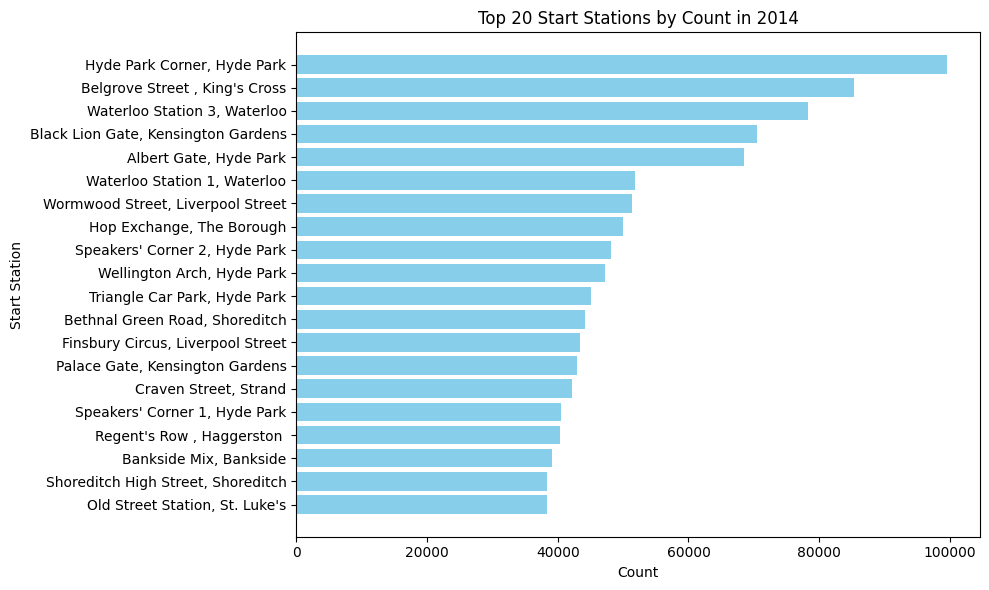

In [ ]:
# Collecting the data for the first 20 stations
stations_data = start_station_count.limit(20).toPandas()

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(stations_data['StartStation Name'], stations_data['Count'], color='skyblue')
plt.xlabel('Count')
plt.ylabel('Start Station')
plt.title('Top 20 Start Stations by Count in 2014')
plt.gca().invert_yaxis()  # Invert y-axis to display the station with the highest count at the top
plt.tight_layout()
plt.show()

# Hyde Park Corner has the highest number of bike users or rentals, as such, more bike can be
# allocated to this station

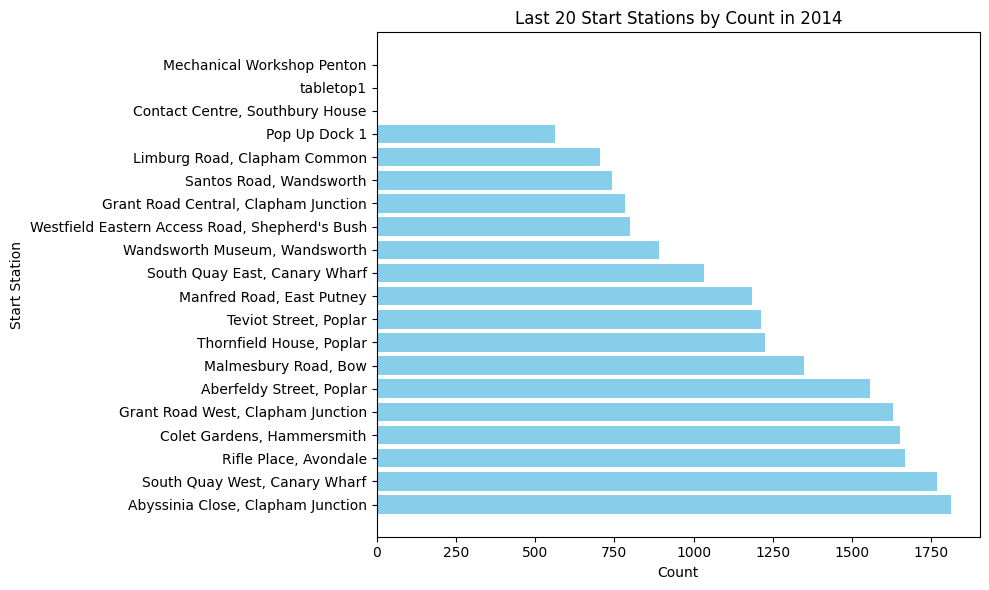

In [ ]:
# Collecting the data for the last 20 stations
stations_data_desc = start_station_count.orderBy('Count').limit(20).toPandas()

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(stations_data_desc['StartStation Name'], stations_data_desc['Count'], color='skyblue')
plt.xlabel('Count')
plt.ylabel('Start Station')
plt.title('Last 20 Start Stations by Count in 2014')
plt.gca().invert_yaxis()  # Invert y-axis to display the station with the highest count at the top
plt.tight_layout()
plt.show()

**Start stations with the highest and the lowest duration in hours**

In [ ]:
start_station_dur = (cycle_df_2014.select("StartStation Id", "StartStation Name", "EndStation Id", "EndStation Name","Duration")
         .groupBy("StartStation Name")).agg({'Duration': 'sum'}).withColumn('Duration(hours)', round(col('sum(Duration)')/3600)).orderBy("sum(Duration)", ascending=False)

In [ ]:
start_station_dur.show(3)

+--------------------+-------------+---------------+
|   StartStation Name|sum(Duration)|Duration(hours)|
+--------------------+-------------+---------------+
|Hyde Park Corner,...|  2.7501978E8|        76394.0|
|Black Lion Gate, ...|  2.0044944E8|        55680.0|
|Speakers' Corner ...|  1.6313646E8|        45316.0|
+--------------------+-------------+---------------+
only showing top 3 rows



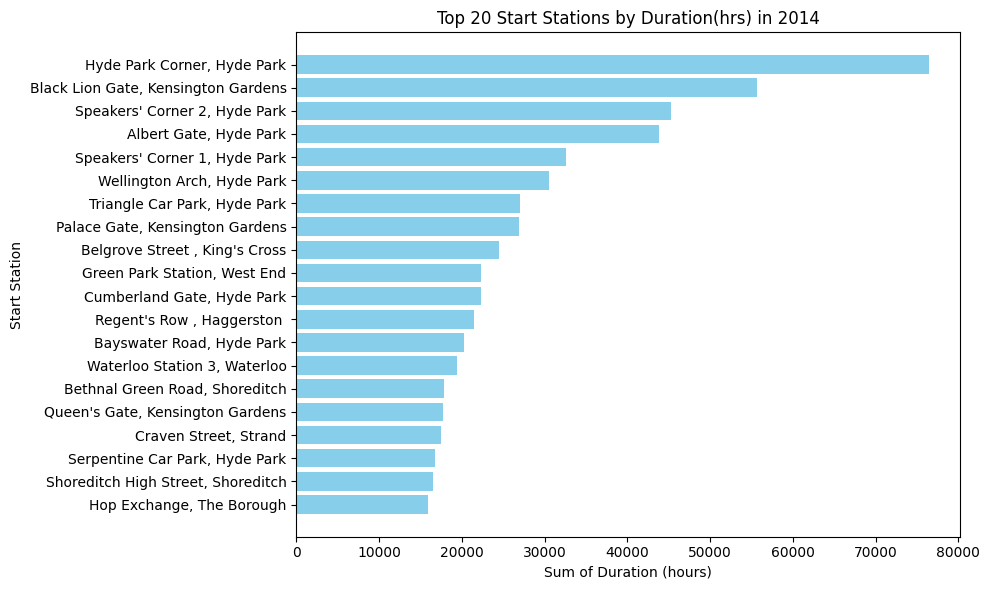

In [ ]:
# Collecting the data for the first 20 start stations
stations_data = start_station_dur.limit(20).toPandas()

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(stations_data['StartStation Name'], stations_data['Duration(hours)'], color='skyblue')
plt.xlabel('Sum of Duration (hours)')
plt.ylabel('Start Station')
plt.title('Top 20 Start Stations by Duration(hrs) in 2014')
plt.gca().invert_yaxis()  # Invert y-axis to display the station with the highest count at the top
plt.tight_layout()
plt.show()

Overall, Hyde park has the highest number of bikes usage with longer hours of ride, compare to other station. Later, it can be seen that the number of rental doesn't determine the number of hours ride, Black lion gate station and  speakers corner station which has a lower rental count compared to waterloo station 3 and Belgroove street now have a higher number of hourly ride in 2014. We can deduced that probably the users in this former 2 street travel far to the end station compare to the later.

Also, among the top 8, 6 stations in hyde park and 2 in kesington have a higher bike usage in term of duration, indicating that more revenue might have been generated from this locations, therefore they should be given more preference in term of maintenance inorder not to loose the users

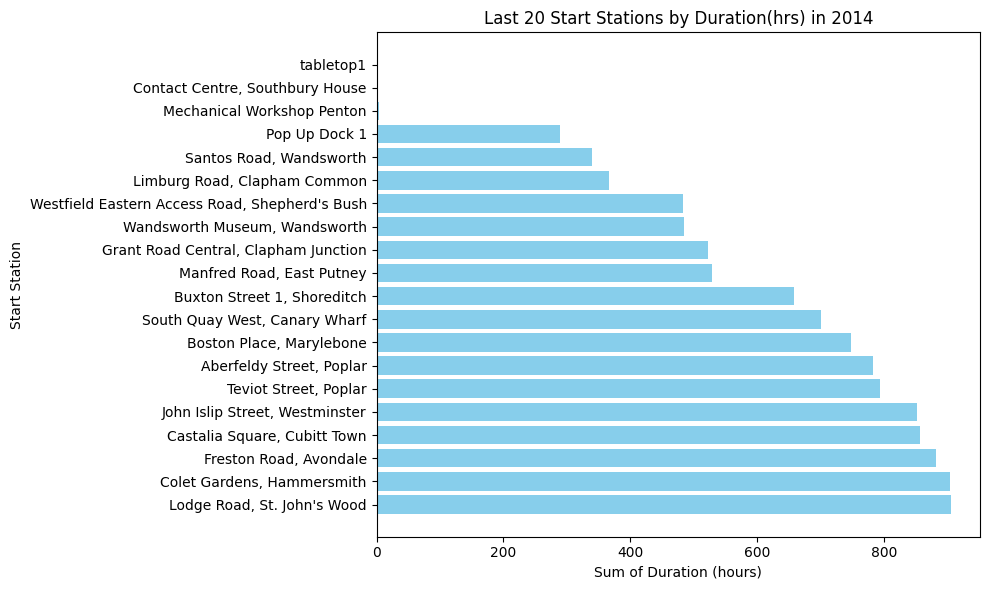

In [ ]:
# Collecting the data for the last 20 start stations
stations_dur_desc = start_station_dur.orderBy('Duration(hours)').limit(20).toPandas()

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(stations_dur_desc['StartStation Name'], stations_dur_desc['Duration(hours)'], color='skyblue')
plt.xlabel('Sum of Duration (hours)')
plt.ylabel('Start Station')
plt.title('Last 20 Start Stations by Duration(hrs) in 2014')
plt.gca().invert_yaxis()  # Invert y-axis to display the station with the highest count at the top
plt.tight_layout()
plt.show()

In [ ]:
stations_dur_desc.head()

,StartStation Name,sum(Duration),Duration(hours)
0,tabletop1,1500.0,0.0
1,"Contact Centre, Southbury House",8820.0,2.0
2,Mechanical Workshop Penton,15120.0,4.0
3,Pop Up Dock 1,1039140.0,289.0
4,"Santos Road, Wandsworth",1219740.0,339.0


In [ ]:
stations_data_desc.head()

,StartStation Name,Count
0,Mechanical Workshop Penton,1
1,tabletop1,2
2,"Contact Centre, Southbury House",5
3,Pop Up Dock 1,562
4,"Limburg Road, Clapham Common",705


From the dataframe and chart above, it can be seen that there are 3 start stations namely: Mechanical Workshop preston, tabletop 1 station and Contact centre southbury house station are the least patronized start station having 1, 2 and 5 rides respectively. In the whole year, the number of usage is very low.

Mechanical workshop station has only 1 rental but the duration travelled is higher than the other 2 stations. Contact centre station that has more ride had the lowest duration when compared with the other 2 station

The likely factor that may result in this low rental are:

1.The station may not be easily accessible to user
2. Nearby station might be convenient in usage and the station  might not be appealing to users

In [ ]:
# showing the 3 start stations with less usage
least_used_station = ['Mechanical Workshop Penton', 'tabletop1', 'Contact Centre, Southbury House' ]
cycle_df_2014.filter(col('StartStation Name').isin(least_used_station)).show()

+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+----------+----------+----------+-----------+---------+
|Rental Id|Duration|Bike Id|        End Date|EndStation Id|     EndStation Name|      Start Date|StartStation Id|   StartStation Name|Date Start|Time Start|Start_year|Start_month|Start_day|
+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+----------+----------+----------+-----------+---------+
| 31448297|     540|   1460|26/03/2014 11:57|          198|           tabletop1|26/03/2014 11:48|            198|           tabletop1|26/03/2014|     11:48|      2014|         03|       26|
| 31448453|     960|   1460|26/03/2014 12:14|          198|           tabletop1|26/03/2014 11:58|            198|           tabletop1|26/03/2014|     11:58|      2014|         03|       26|
| 36446039|     240|   9495|18/08/2014 13:05|     

For the start station at tabletop1 and Contact station, the bikes were returned back to the same station. it can be deduced that there may not be any other nearby station and the station might be located in a place where bicycles are not needed. for Mechanical workshop, the only usage was for a longer duration and ends at another station. It can be seen that the user needs to travel far
So in summary, this stations are most likely situated in areas that has no nearby end station



Monthly trends

In [ ]:
# creating a datafram that indicates the average monthly duration and total number of ride in each month
cycle_monthly_avg = cycle_df_2014.groupBy('Start_month').agg({'Duration':'mean'}).withColumn('Duration mean hour', col('avg(Duration)')/60).orderBy('Start_month', )
cycle_monthly_count = cycle_df_2014.groupBy('Start_month').agg({'Duration':'count'}).orderBy('Start_month')

cycle_monthly = cycle_monthly_avg.join(cycle_monthly_count, on='Start_month', how='inner')
cycle_monthly = cycle_monthly.orderBy('Start_month')
cycle_monthly = cycle_monthly.toPandas()
cycle_monthly.head()

,Start_month,avg(Duration),Duration mean hour,count(Duration)
0,01,1247.050524,20.784175,486344
1,02,1293.880819,21.564680,514631
2,03,1440.439500,24.007325,746211
3,04,1530.182287,25.503038,793912
4,05,1577.860285,26.297671,877313


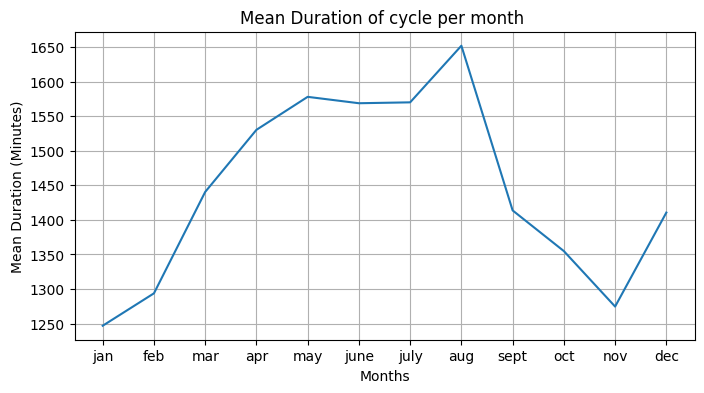

In [ ]:
# A line plot showing the change in average duration across the months


plt.figure(figsize=(8,4))
plt.plot(cycle_monthly['Start_month'], cycle_monthly['avg(Duration)'])
plt.xlabel('Months')
plt.ylabel('Mean Duration (Minutes)')
plt.title('Mean Duration of cycle per month ')
plt.xticks(range(0,12), ['jan', 'feb', 'mar', 'apr', 'may', 'june', 'july', 'aug', 'sept', 'oct', 'nov', 'dec'])
plt.grid()
plt.show()

The average duration in each month shows that the least period of ride is January due to the season(i.e winter)
In the summer time, the cyclist duration is high of about 1,650 minutes in August due to the holidays period and then a sharp decrease in September, as most people resumes back to work and school.
Between April and June ther is no significant increase in the average duration

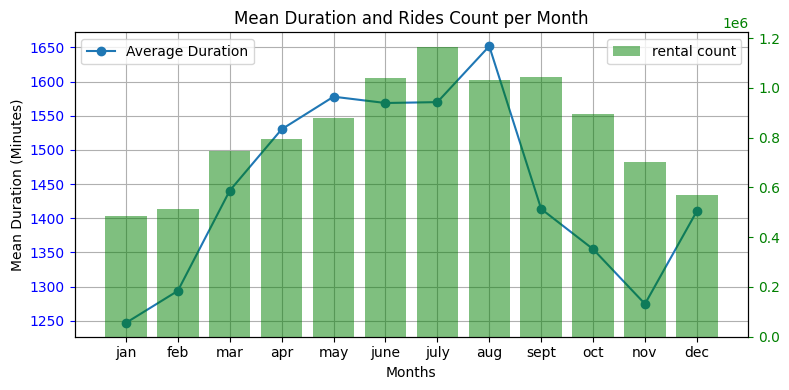

In [ ]:
fig, ax1 = plt.subplots(figsize=(8, 4))


ax1.plot(cycle_monthly['Start_month'], cycle_monthly['avg(Duration)'], marker='o', label='Average Duration')
ax1.set_xlabel('Months')
ax1.set_ylabel('Mean Duration (Minutes)')
ax1.tick_params('y', colors='b')


ax2 = ax1.twinx()
ax2.bar(cycle_monthly['Start_month'], cycle_monthly['count(Duration)'], alpha=0.5, color='g', label='rental count')
# ax2.xlabel('Months')
# ax2.ylabel('Count')
ax2.tick_params('y', colors='g')

# plt.title('Mean Duration of cycle per month')
months = ['jan', 'feb', 'mar', 'apr', 'may', 'june', 'july', 'aug', 'sept', 'oct', 'nov', 'dec']
ax1.set_xticks(range(0,12))
ax1.set_xticklabels(months)

# Add grid and legend
ax1.grid(True)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('Mean Duration and Rides Count per Month')
plt.tight_layout()
plt.show()

In August, the mean duration of ride is high even though the number of user is less conpare to July. this means that user cover longer distance in august than any other month. this long duration of travel may be as a result of holiday.  

the average duration in November, January and February are below 1300 minutes. One would have thought that the average duration in December would have been the same since it is also the winter period, but the increase due to the holiday also

I suggest that the increase in the average riding duration was due to the fact that it is in the holiday season.


# January, 2014

In [ ]:
# getting all the rides in January 2014, which is also the winter period
Jan_2014 = cycle_df_2014.filter(col('Start_month') == '01')
Jan_2014.show()

+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+----------+----------+----------+-----------+---------+
|Rental Id|Duration|Bike Id|        End Date|EndStation Id|     EndStation Name|      Start Date|StartStation Id|   StartStation Name|Date Start|Time Start|Start_year|Start_month|Start_day|
+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+----------+----------+----------+-----------+---------+
| 29747123|    1140|    469|05/01/2014 15:54|           55|Finsbury Circus, ...|05/01/2014 15:35|            295|Swan Street, The ...|05/01/2014|     15:35|      2014|         01|       05|
| 29764212|    1560|   6924|06/01/2014 23:30|           93|Cloudesley Road, ...|06/01/2014 23:04|            311|Foley Street, Fit...|06/01/2014|     23:04|      2014|         01|       06|
| 29824742|    1200|   4115|09/01/2014 23:25|     

In [ ]:
# the sum of duration in each day in the month of january, 2014
Jan_2014_plt = Jan_2014.select('Bike Id', 'Duration', 'Start_month', 'Start_day').groupBy('Start_day').agg({'Duration':'sum'}).select('Start_day', "sum(Duration)", (round(col('sum(Duration)')/3600)).alias('Hours')).orderBy('Start_day')

Jan_2014_plt.show()

+---------+-------------+------+
|Start_day|sum(Duration)| Hours|
+---------+-------------+------+
|       01|    1.56858E7|4357.0|
|       02|   1.974726E7|5485.0|
|       03|   1.275186E7|3542.0|
|       04|    8183700.0|2273.0|
|       05|   2.079774E7|5777.0|
|       06|   1.260606E7|3502.0|
|       07|   1.925412E7|5348.0|
|       08|   2.527098E7|7020.0|
|       09|   2.057982E7|5717.0|
|       10|   2.062458E7|5729.0|
|       11|   3.108228E7|8634.0|
|       12|   2.210694E7|6141.0|
|       13|   1.667106E7|4631.0|
|       14|   2.261688E7|6282.0|
|       15|    1.74972E7|4860.0|
|       16|   1.782756E7|4952.0|
|       17|   2.026092E7|5628.0|
|       18|   2.864352E7|7957.0|
|       19|   2.893086E7|8036.0|
|       20|   2.354406E7|6540.0|
+---------+-------------+------+
only showing top 20 rows



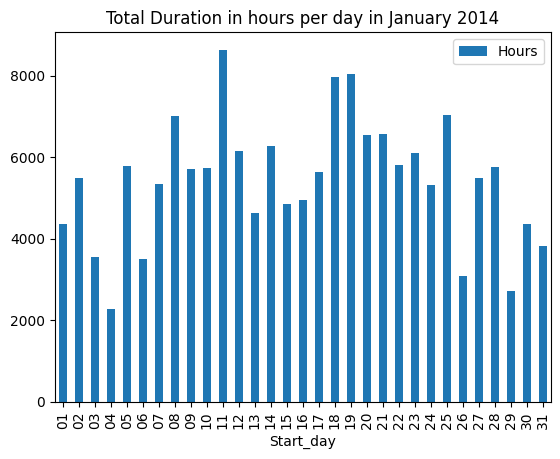

In [ ]:
# a plot of total duration in hours in each day in the month of January
plot_jan_14 = Jan_2014_plt[['Start_day', 'Hours']].toPandas()
plot_jan_14.plot(kind='bar', y='Hours', x='Start_day')
plt.title('Total Duration in hours per day in January 2014')
plt.show()

From the above plot, it can be deduced that more hourly ride are made on the 11th, 18th, and 19th of January, 2014. When checked, these dates are on weekends. we can say that more cycles are made on weekend even on winter period.
the lowest ride is on the 4th, January, 2014 which is also a weekend. this might be due to snow fall

In [ ]:
# The total number of bikes usage in January, 2014
Jan_2014.count()

486344

In [ ]:
# rides above 3hours
Jan_2014.filter('Duration > 10800').count()

1863

In [ ]:
plot_jan_bk = Jan_2014.filter('Duration > 10800').select('StartStation Name', 'Duration').orderBy('StartStation Name').agg({'Duration':'max'}).toPandas()

plot_jan_bk.head()

# plot_jan_bk.plot(kind='scatter', y='Duration', x='Bike Id')
# plt.title('duration of bike rode in january in seconds')
# plt.show()

,max(Duration)
0,99720


#July 2014

In [ ]:
July_2014 = cycle_df_2014.filter(col('Start_month') == '07')
July_2014.show()

+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+----------+----------+----------+-----------+---------+
|Rental Id|Duration|Bike Id|        End Date|EndStation Id|     EndStation Name|      Start Date|StartStation Id|   StartStation Name|Date Start|Time Start|Start_year|Start_month|Start_day|
+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+----------+----------+----------+-----------+---------+
| 34603487|     660|   6328|03/07/2014 11:51|          695|Islington Green, ...|03/07/2014 11:40|             22|Northington Stree...|03/07/2014|     11:40|      2014|         07|       03|
| 34689078|     120|   2006|05/07/2014 15:09|          357|Howland Street, F...|05/07/2014 15:07|            311|Foley Street, Fit...|05/07/2014|     15:07|      2014|         07|       05|
| 34724273|    1260|   7904|06/07/2014 16:35|     

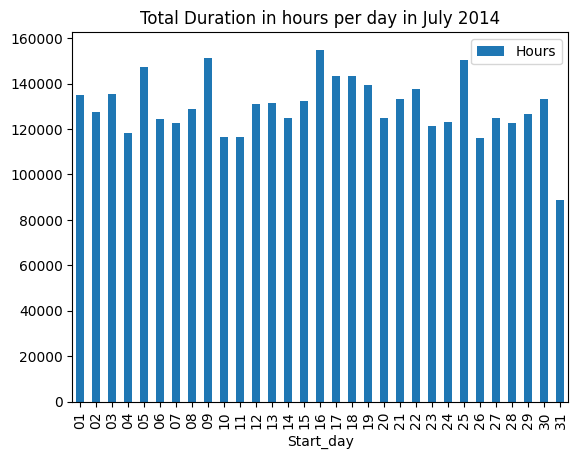

In [ ]:
Jul_2014_plt = cycle_df_2014.select( 'Duration', 'Start_month', 'Start_day').groupBy('Start_day').agg({'Duration':'sum'}).select('Start_day', "sum(Duration)", (round(col('sum(Duration)')/3600)).alias('Hours')).orderBy('Start_day')

plot_jul_14 = Jul_2014_plt[['Start_day', 'Hours']].toPandas()
plot_jul_14.plot(kind='bar', y='Hours', x='Start_day')
plt.title('Total Duration in hours per day in July 2014')
plt.show()

In July, there is no pattern to the duration (hours) in each day, no day has its total hours below 100000, except the last day.

# **Extraction of ride and separation of bike rode from baylis station and from other station**

In [ ]:
# Taking out the rows that have their start staion from Baylis Road, waterloo
baylis_2014 = cycle_df_2014.filter(cycle_df_2014['StartStation Name']== 'Baylis Road, Waterloo')

baylis_2014.show(10)

+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+----------+----------+----------+-----------+---------+
|Rental Id|Duration|Bike Id|        End Date|EndStation Id|     EndStation Name|      Start Date|StartStation Id|   StartStation Name|Date Start|Time Start|Start_year|Start_month|Start_day|
+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+----------+----------+----------+-----------+---------+
| 34335942|     600|   7213|25/06/2014 18:59|          199|Great Tower Stree...|25/06/2014 18:49|            272|Baylis Road, Wate...|25/06/2014|     18:49|      2014|         06|       25|
| 34292680|     540|  11506|24/06/2014 18:12|          199|Great Tower Stree...|24/06/2014 18:03|            272|Baylis Road, Wate...|24/06/2014|     18:03|      2014|         06|       24|
| 34251992|     600|   1845|23/06/2014 17:58|     

In [ ]:
# taking the datas that have their start station form other stations apart from Baylis Road, Waterloo
other_station_2014 = cycle_df_2014.filter(cycle_df['StartStation Name'] != 'Baylis Road, Waterloo')

other_station_2014.show()

+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+----------+----------+----------+-----------+---------+
|Rental Id|Duration|Bike Id|        End Date|EndStation Id|     EndStation Name|      Start Date|StartStation Id|   StartStation Name|Date Start|Time Start|Start_year|Start_month|Start_day|
+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+----------+----------+----------+-----------+---------+
| 34263367|    1080|   9076|24/06/2014 00:57|          695|Islington Green, ...|24/06/2014 00:39|            311|Foley Street, Fit...|24/06/2014|     00:39|      2014|         06|       24|
| 34603487|     660|   6328|03/07/2014 11:51|          695|Islington Green, ...|03/07/2014 11:40|             22|Northington Stree...|03/07/2014|     11:40|      2014|         07|       03|
| 34689078|     120|   2006|05/07/2014 15:09|     

In [ ]:
# all rides in 2014 were 9,895,412 in total
cycle_df_2014.count()


9864161

In [ ]:
# The total number of rides starting from Baylis Station
baylis_2014.count()


26326

In [ ]:
# the total number of rides starting from other stations excluding Baylis Station
other_station_2014.count()

9837835

In [ ]:
#This shows the number of bikes that TFL has in total or that are in operation in the year 2014, across all station
cycle_df_2014.select('Bike Id').distinct().count()

12229

In [ ]:
# Counting the number of ride in each month starting from the baylis station
baylis_2014.groupBy("Start_month").count().orderBy("start_month", ascending=True).show()

+-----------+-----+
|Start_month|count|
+-----------+-----+
|         01| 1463|
|         02| 1452|
|         03| 1947|
|         04| 2074|
|         05| 2397|
|         06| 2679|
|         07| 3017|
|         08| 2671|
|         09| 2776|
|         10| 2350|
|         11| 2013|
|         12| 1487|
+-----------+-----+



In [ ]:
# counting the number of ride in each month from other station
other_station_2014.groupBy("Start_month").count().orderBy("start_month", ascending=True).show()



+-----------+-------+
|Start_month|  count|
+-----------+-------+
|         01| 484881|
|         02| 513179|
|         03| 744264|
|         04| 791838|
|         05| 874916|
|         06|1035196|
|         07|1161954|
|         08|1028858|
|         09|1040647|
|         10| 890729|
|         11| 701442|
|         12| 569931|
+-----------+-------+



In [ ]:
# This displays the average duration covered in seconds in each month, at the same time, the data is ordered by month
# Another column containing average hours covered in each month is also created and named Baylis_avg_duration
baylis_mnth_avg = baylis_2014.groupBy("Start_month").agg({'Duration': "mean"}).orderBy("Start_month", ascending=True).select('Start_month', 'avg(Duration)').withColumnRenamed('avg(Duration)', 'baylis_avg_duration')

baylis_mnth_avg.show()

+-----------+-------------------+
|Start_month|baylis_avg_duration|
+-----------+-------------------+
|         01|  960.2870813397129|
|         02| 1064.6280991735537|
|         03|   894.668721109399|
|         04|  881.6007714561234|
|         05|  1050.938673341677|
|         06|  1110.615901455767|
|         07| 1286.0921445144184|
|         08| 1029.8165481093224|
|         09| 1247.9394812680116|
|         10|  879.4212765957446|
|         11| 1048.9418777943367|
|         12|  851.7014122394082|
+-----------+-------------------+



In [ ]:
# the average duration spent from other stations was calculated
# the duration in hours was calculated and renamed as Other_station_avg_duration
# only the average duration and start_month was selected from the dataframe
OtherSta_mnth_avg = other_station_2014.groupBy("Start_month").agg({'Duration': "mean"}).orderBy("start_month", ascending=True).select('Start_month', 'avg(Duration)').withColumnRenamed('avg(Duration)', 'Other_station_avg_duration')

OtherSta_mnth_avg.show()

+-----------+--------------------------+
|Start_month|Other_station_avg_duration|
+-----------+--------------------------+
|         01|        1247.9157566495696|
|         02|        1294.5294721724779|
|         03|        1441.8672406565413|
|         04|        1531.8810665818007|
|         05|        1579.3038874589104|
|         06|        1569.8077658723566|
|         07|        1570.6447931673715|
|         08|        1653.3606386887209|
|         09|        1414.1419520740462|
|         10|        1356.1646696133168|
|         11|        1275.4024138845407|
|         12|        1412.0464056175222|
+-----------+--------------------------+



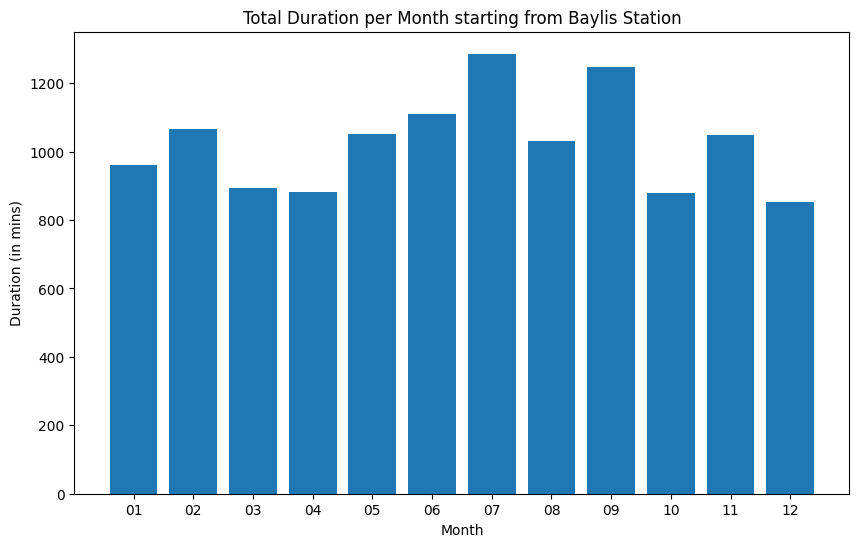

In [ ]:
# Importing pandas and matplotlib
import matplotlib.pyplot as plt
import pandas as pd

#converting the pyspark dataframe to pandas
baylis_mnth_avg_pd = baylis_mnth_avg.toPandas()

# plotting a bar chart
plt.figure(figsize=(10, 6))
plt.bar(baylis_mnth_avg_pd['Start_month'], baylis_mnth_avg_pd['baylis_avg_duration'])
plt.xlabel('Month')
plt.ylabel('Duration (in mins)')
plt.title('Average Duration per Month starting from Baylis Station')
# plt.tight_layout()
plt.show()

The average duration starting from Baylis road is high in July and September compare to other months

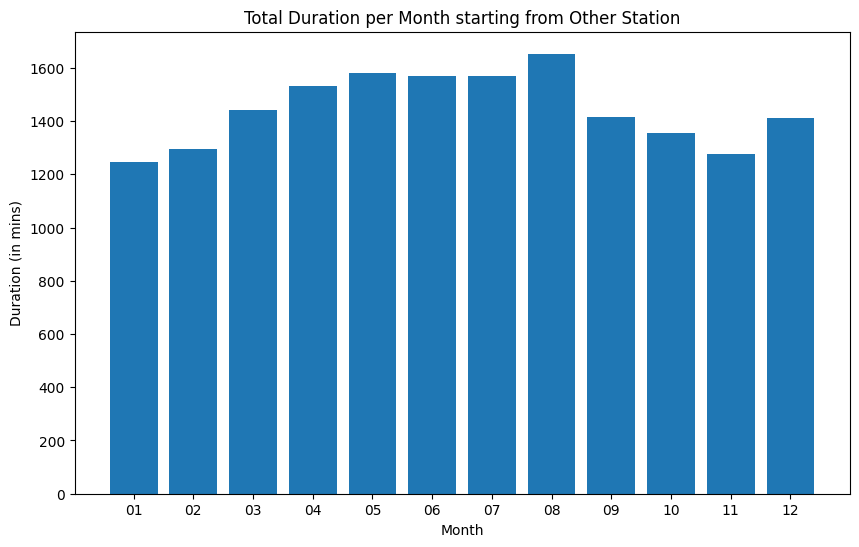

In [ ]:

#converting the pyspark dataframe to pandas
OtherSta_mnth_avg_pd = OtherSta_mnth_avg.toPandas()

plt.figure(figsize=(10, 6))
plt.bar(OtherSta_mnth_avg_pd['Start_month'], OtherSta_mnth_avg_pd['Other_station_avg_duration'])
plt.xlabel('Month')
plt.ylabel('Duration (in mins)')
plt.title('Average Duration per Month starting from Other Station')

plt.show()

the average duration from other station during August is high compare to other month

# **Hypothesis testing**

In [ ]:
# Joining the 2 col, for baylis station and other stations,
# taking their average time covered in hours per month
ride_2014 = baylis_mnth_avg.join(OtherSta_mnth_avg, on="Start_month")
# ride_2014.select('Baylis_Hours', 'Other_station_Hours')
ride_2014.show()

+-----------+-------------------+--------------------------+
|Start_month|baylis_avg_duration|Other_station_avg_duration|
+-----------+-------------------+--------------------------+
|         07| 1286.0921445144184|        1570.6447931673715|
|         06|  1110.615901455767|        1569.8077658723566|
|         05|  1050.938673341677|        1579.3038874589104|
|         04|  881.6007714561234|        1531.8810665818007|
|         03|   894.668721109399|        1441.8672406565413|
|         08| 1029.8165481093224|        1653.3606386887209|
|         09| 1247.9394812680116|        1414.1419520740462|
|         02| 1064.6280991735537|        1294.5294721724779|
|         10|  879.4212765957446|        1356.1646696133168|
|         01|  960.2870813397129|        1247.9157566495696|
|         11| 1048.9418777943367|        1275.4024138845407|
|         12|  851.7014122394082|        1412.0464056175222|
+-----------+-------------------+--------------------------+



In [ ]:
# Selecting the two columns in seconds for hypothesis testing

ride_test_2014 = ride_2014.select('Start_month', 'baylis_avg_duration', 'other_station_avg_duration').orderBy("Start_month", ascending=True)

ride_test_2014.show()

+-----------+-------------------+--------------------------+
|Start_month|baylis_avg_duration|other_station_avg_duration|
+-----------+-------------------+--------------------------+
|         01|  960.2870813397129|        1247.9157566495696|
|         02| 1064.6280991735537|        1294.5294721724779|
|         03|   894.668721109399|        1441.8672406565413|
|         04|  881.6007714561234|        1531.8810665818007|
|         05|  1050.938673341677|        1579.3038874589104|
|         06|  1110.615901455767|        1569.8077658723566|
|         07| 1286.0921445144184|        1570.6447931673715|
|         08| 1029.8165481093224|        1653.3606386887209|
|         09| 1247.9394812680116|        1414.1419520740462|
|         10|  879.4212765957446|        1356.1646696133168|
|         11| 1048.9418777943367|        1275.4024138845407|
|         12|  851.7014122394082|        1412.0464056175222|
+-----------+-------------------+--------------------------+



In [ ]:
# from pyspark import SparkContext
from pyspark.mllib.linalg import Vectors, Matrices
from pyspark.mllib.stat import Statistics
from pyspark.ml.stat import Summarizer


# https://www.machinelearningplus.com/pyspark/pyspark-chi-square-test/

In [ ]:
# µ1 = Rides in 2014 starting from Baylis Road, Waterloo station were not shorter compared to other stations
# µ2 = Rides in 2014 starting from Baylis Road, Waterloo station were shorter compared to other stations

# H_0 = µ1 = µ2
# H_1 = µ1 < µ2

In [ ]:
from scipy import stats



# ride_test_2014 = ride_test_2014.withColumnRenamed("Baylis_mins", "BaylisHours").withColumnRenamed("Other_station_Hours", "OtherStationHours")

# Conversion of DataFrame to Pandas DataFrame for t-test
ride_test_pd = ride_test_2014.toPandas()

# Perform two-sample t-test
t_statistic, p_value = stats.ttest_ind(ride_test_pd['baylis_avg_duration'], ride_test_pd['other_station_avg_duration'], equal_var=False)

# Print results
print("T-statistic:", t_statistic)
print("P-value:", p_value)




T-statistic: -7.432747917582017
P-value: 1.9865071945592685e-07


In [ ]:
# Since the p-value is less than the significance level(0.05), we will reject the null hypothesis i.e we will not accept the null hypothesis

# We will then accept the H1, i.e, the average

In [ ]:
ride_test_pd

,Start_month,baylis_avg_duration,other_station_avg_duration
0,01,960.287081,1247.915757
1,02,1064.628099,1294.529472
2,03,894.668721,1441.867241
3,04,881.600771,1531.881067
4,05,1050.938673,1579.303887
5,06,1110.615901,1569.807766
6,07,1286.092145,1570.644793
7,08,1029.816548,1653.360639
8,09,1247.939481,1414.141952
9,10,879.421277,1356.164670
